In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
message  = pd.read_csv(r'/content/SMSSpamCollection.csv')
message.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [4]:
message.rename(columns={message.columns[0]:'Label',message.columns[1]:'Text'},inplace=True)
message.drop_duplicates(inplace=True)
message['Label'] = message['Label'].replace({'ham':0,'spam':1})

In [5]:
message.head()

,Label,Text
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [8]:
cv = CountVectorizer(stop_words='english', max_features=10000)
x_vec = cv.fit_transform(message['Text']).toarray()
y = message['Label'].values

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_vec,y,test_size=0.2,random_state=0)
ml = MultinomialNB()
ml.fit(x_train,y_train)

MultinomialNB()

In [14]:
prd = ml.predict(x_test)
ml.score(x_test,y_test)

0.965183752417795

In [17]:
print(prd[:20])
print(y_test[:20])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


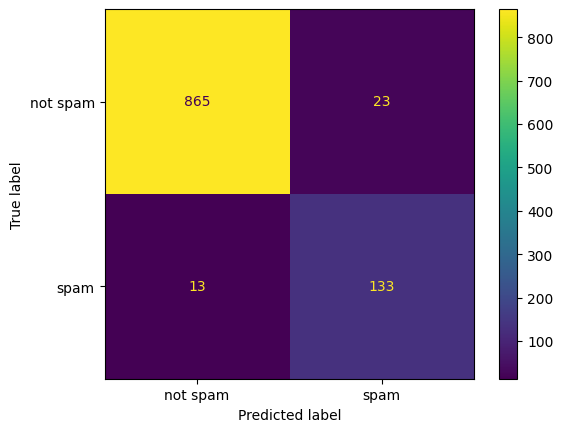

In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cnf = confusion_matrix(y_test,prd)
ax = ConfusionMatrixDisplay(confusion_matrix=cnf,display_labels=['not spam','spam']).plot()
plt.show()